In [37]:
using Plots, LinearAlgebra, SparseArrays, FFTW, Statistics
theme(:dracula)

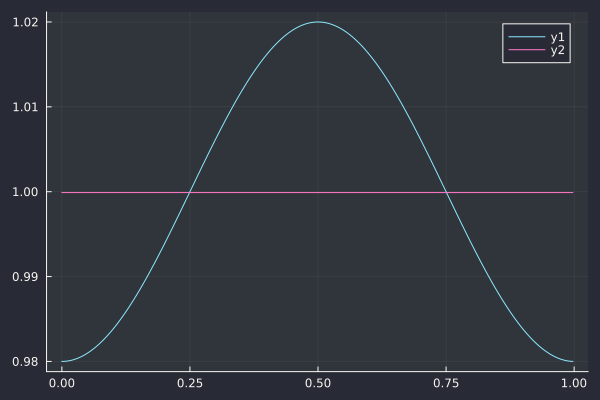

In [48]:
geomean(c) = exp(mean(log.(c)))

nt = 400
t = range(0., 1. - 1/nt, nt)

v = -8cos.(2π*t)

α = .1
ϕ_v = 1 .+ v./nt
ϕ = geomean(ϕ_v)
λ = nt*(ϕ - 1)
# ϕ_v[end] *= α

plot(t, ϕ_v)
plot!(t, ϕ*ones(nt))

In [49]:
A = zeros(nt, nt)
B = zeros(nt, nt)

A[diagind(A)] .= 1.0
A[diagind(A,-1)] .= -ϕ
A[1,end] = -ϕ

B[diagind(B)] .= 1.0
B[diagind(B,-1)] .= -ϕ_v[1:end-1]
B[1,end] = -ϕ_v[end]
A

400×400 Matrix{Float64}:
  1.0      0.0      0.0      0.0     …   0.0      0.0      0.0     -0.9999
 -0.9999   1.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0     -0.9999   1.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0     -0.9999   1.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0     -0.9999      0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0     …   0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  ⋮                                  ⋱                             
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0        

In [50]:
B

400×400 Matrix{Float64}:
  1.0    0.0        0.0       0.0       …   0.0        0.0      -0.980002
 -0.98   1.0        0.0       0.0           0.0        0.0       0.0
  0.0   -0.980002   1.0       0.0           0.0        0.0       0.0
  0.0    0.0       -0.98001   1.0           0.0        0.0       0.0
  0.0    0.0        0.0      -0.980022      0.0        0.0       0.0
  0.0    0.0        0.0       0.0       …   0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  ⋮                                     ⋱                       
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0    0.0        0.0       0.0           0.0        0.0       0.0
  0.0   

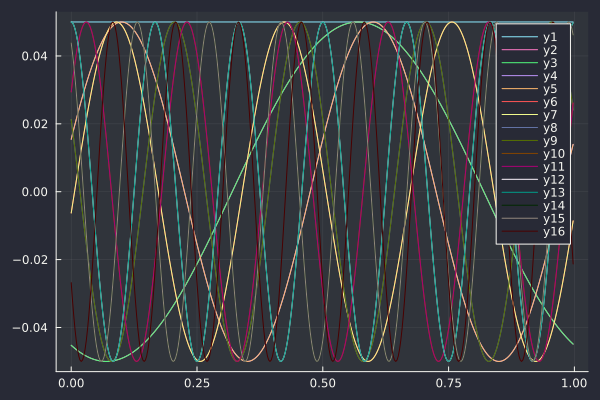

In [51]:
ea = eigen(A)
eb = eigen(B)

plot(t, real.(ea.vectors[:, 1:16]))

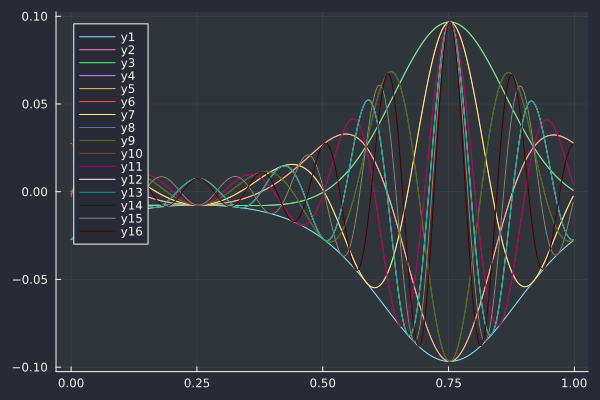

In [52]:
plot(t, real.(eb.vectors[:, 1:16]))
# plot(; aspect_ratio=1.)
# for i = 1:6
#     plot!(eb.vectors[:, i])
# end
# plot!()

The eigenvectors of $B$ are the fourier modes multiplied by a diagonal matrix given by some envelope function,
and the eigenvalues of $A$ and $B$ are identical.
The first eigenvector for the circulant matrix $A$ is constant, while the first eigenvector for $B$ appears to be this envelope function.
The idea is to find this envelope function by using our paradiag preconditioner to simultaneously solve the eigenvector problem.

In [ ]:
eb.vectors